In [2851]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

#Setting of proper views of rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2852]:
#Importing dataset
df = pd.read_csv(r'E:\EDA\Assignment\Countries Assignment\Country-data.csv')
#Exploring the top 5 rows
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Sanity Checks

In [2853]:
#Exploring the last 5 rows
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [2854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [2855]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [2856]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [2857]:
df.shape

(167, 10)

# Missing Data Check

In [2858]:
#percentage of missing value in the data.
percentage_df = (df.isnull().mean())*100
percentage_df = pd.DataFrame(percentage_df)
percentage_df = percentage_df.reset_index() 
percentage_df.columns = ["Column_Name","Pencentage_null"]  
percentage_df

,Column_Name,Pencentage_null
0,country,0.0
1,child_mort,0.0
2,exports,0.0
3,health,0.0
4,imports,0.0
5,income,0.0
6,inflation,0.0
7,life_expec,0.0
8,total_fer,0.0
9,gdpp,0.0


No Missing Data found

# Data Preparation

Converting imports,exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country.

In [2859]:
#Converting exports,imports and health spending percentages to absolute values.
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


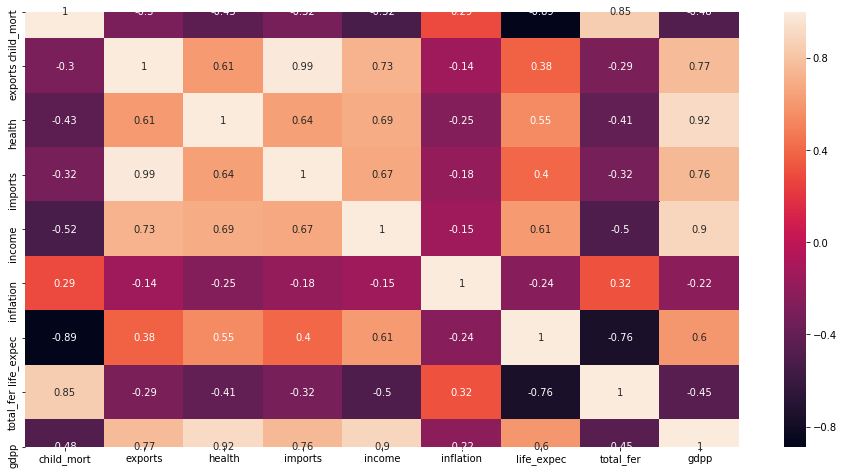

In [2860]:
#Plotting the correlation matrix and check if the data is indeed highly correlated
plt.figure(figsize = (16,8))        
sns.heatmap(df.corr(),annot = True)
plt.show()

A lot of highly correlated variables exist, hence the usage of PCA is justified.

In [2861]:
#The final matrix would only contain the data columns. Hence we drop the country column
df1=df.drop(['country'],axis=1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Scaling

In [2862]:
#Scalling the data using Standard scaler method.
standard_scaler = StandardScaler()
df2 = standard_scaler.fit_transform(df1)
df2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# PCA

In [2863]:
#Importing the PCA module
# pca = PCA(0.9, random_state=42)
pca = PCA(svd_solver='randomized', random_state=42)

In [2864]:
#let's apply PCA
pca.fit(df2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [2865]:
#List of PCA components.It would be the same as the number of variables
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [2866]:
#Checking the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

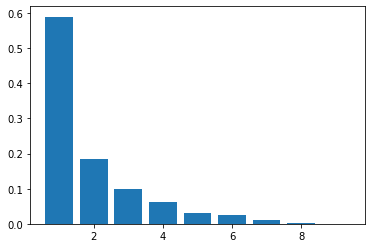

In [2867]:
#ploting the variance ration
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

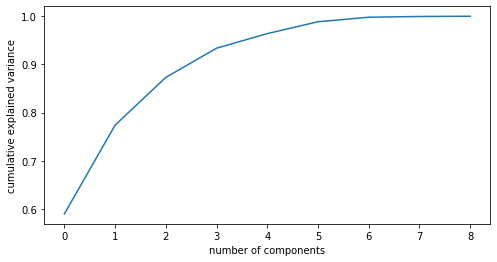

In [2868]:
#Plotting the scree plot
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

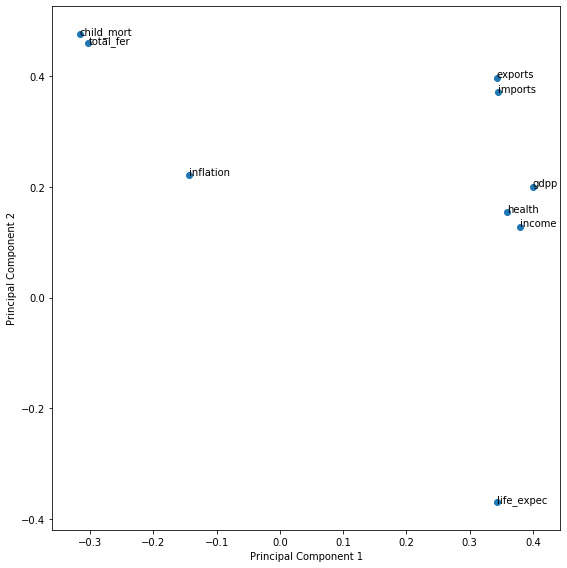

In [2869]:
#Let's visualise the first 2 components
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

# Incremental PCA

In [2870]:
#We are observing 90% variance with 3 principal components.
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final = IncrementalPCA(n_components=3)

In [2871]:
#let's project our original data on the 3 principal components
df_train_pca = pca_final.fit_transform(df2)
#checking the shape of dataset.
df_train_pca.shape

(167, 3)

In [2872]:
#take the transpose of the PC matrix so that we can create the new matrix
pc = np.transpose(df_train_pca)
pc

array([[-2.63744157e+00, -2.22769569e-02, -4.57626261e-01,
        -2.72452030e+00,  6.49848516e-01,  3.71968554e-02,
        -3.32691520e-01,  3.18036154e+00,  3.81568156e+00,
        -4.67515152e-01,  1.49875246e+00,  1.47097104e+00,
        -1.01419903e+00,  8.45238116e-01, -1.34473920e-02,
         3.96087770e+00, -4.02707071e-01, -2.36598657e+00,
        -7.14998191e-01, -1.01778054e+00,  2.52812687e-01,
        -1.13095912e+00,  1.66280202e-01,  2.69525065e+00,
         2.80569006e-01, -2.75387449e+00, -2.76406823e+00,
        -1.17929406e+00, -2.44142939e+00,  3.39411994e+00,
        -5.23229456e-01, -3.24153046e+00, -3.18889212e+00,
         6.92394286e-01, -1.28851026e-01, -1.38822916e-02,
        -1.94991207e+00, -3.11679859e+00, -2.04776384e+00,
         4.31523541e-01, -2.57476033e+00,  8.46278142e-01,
         2.31379384e+00,  1.67463303e+00,  4.37600084e+00,
        -3.67788028e-01, -3.02658561e-01, -8.36646810e-01,
        -3.36572123e-01, -1.05577406e+00, -1.94848965e+0

In [2873]:
#creating the newer matrix according to the given principal components
row = list(df['country'])
pca_df2 = pd.DataFrame({'country':row,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pca_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


# Outliers Treatment

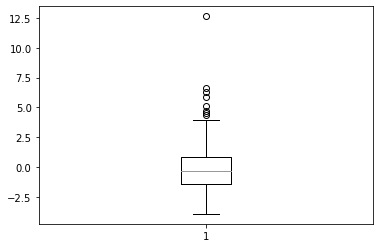

In [2874]:
#The outlier analysis before proceeding to clustering
plt.boxplot(pca_df2.PC1)
Q1 = pca_df2.PC1.quantile(0.05)
Q3 = pca_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC1 >= Q1) & (pca_df2.PC1 <= Q3)]
plt.show()

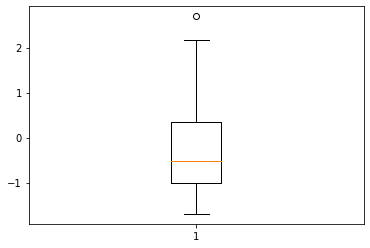

In [2875]:
plt.boxplot(pca_df2.PC2)
Q1 = pca_df2.PC2.quantile(0.05)
Q3 = pca_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC2 >= Q1) & (pca_df2.PC2 <= Q3)]
plt.show()

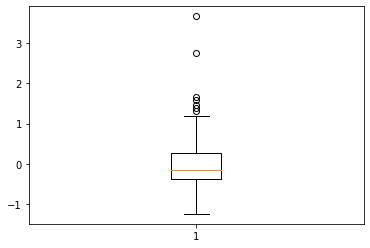

In [2876]:
plt.boxplot(pca_df2.PC3)
Q1 = pca_df2.PC3.quantile(0.05)
Q3 = pca_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pca_df2 = pca_df2[(pca_df2.PC3 >= Q1 ) & (pca_df2.PC3 <= Q3)]
plt.show()

In [2877]:
#Outlier analysis is now done.Let's check the data again.
print(pca_df2.shape)

(119, 4)


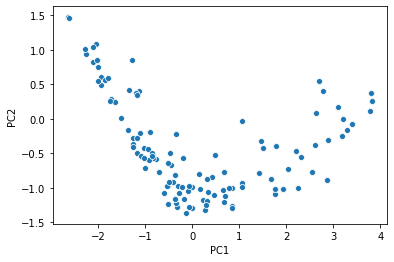

In [2878]:
# Checking the spread of the dataset
sns.scatterplot(x='PC1',y='PC2',data=pca_df2)
plt.show()

# Clustering

**Hopkins Test**

In [2879]:
#Hopkins Test 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [2880]:
#checking the hopkins measure
hopkins(pca_df2.drop(['country'],axis=1))

0.6811190934479844

In [2881]:
#We can do standardisation again.
df3 = pca_df2
df3_1 = standard_scaler.fit_transform(df3.drop(['country'],axis=1))

# K-Mean

For n_clusters=2, the silhouette score is 0.36391199125493856
For n_clusters=3, the silhouette score is 0.35969198888460296
For n_clusters=4, the silhouette score is 0.38496098587451105
For n_clusters=5, the silhouette score is 0.3974339759651044
For n_clusters=6, the silhouette score is 0.3677182091990475
For n_clusters=7, the silhouette score is 0.3696064526518776
For n_clusters=8, the silhouette score is 0.3772913445152187


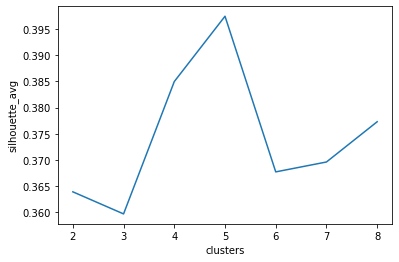

In [2882]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
l =[]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    l.append(silhouette_avg)
plt.plot(range_n_clusters,l)
plt.xlabel('clusters')
plt.ylabel('silhouette_avg')
plt.show()

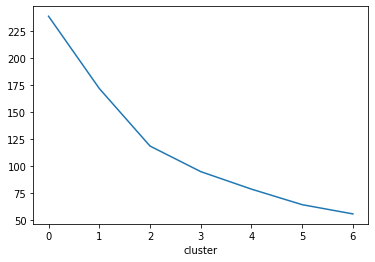

In [2883]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df3_1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.xlabel('cluster')
plt.show()

In [2884]:
#A distinct elbow is formed at around 3-6 clusters.
#K-means with k=3 clusters
model_clus3 = KMeans(n_clusters = 3, max_iter=50,random_state=50)
model_clus3.fit(df3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [2885]:
df4=df3
df4.index = pd.RangeIndex(len(df4.index))
df5 = pd.concat([df4, pd.Series(model_clus3.labels_)], axis=1)
df5.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
df5.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,2
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,0


In [2886]:
#Checking the cluster counts.
df5['ClusterID'].value_counts()

1    65
0    28
2    26
Name: ClusterID, dtype: int64

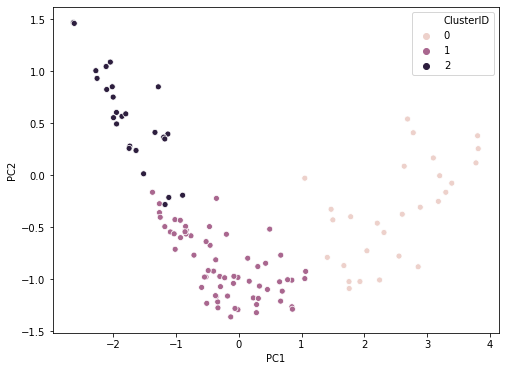

In [2887]:
#Visualising the clusters on the original principal components
#PC1 vs PC2
plt.figure(figsize = (8,6))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=df5)
plt.show()

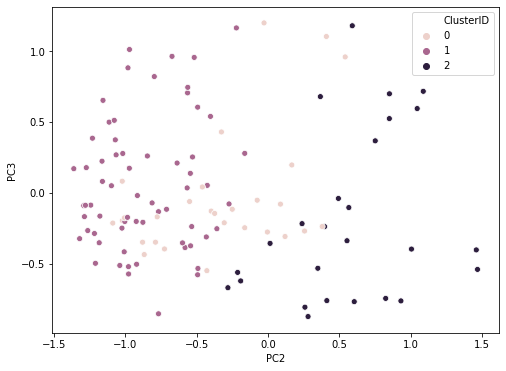

In [2888]:
#Visualising the clusters on the original principal components
#PC2 vs PC3
plt.figure(figsize = (8,6))
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=df5)
plt.show()

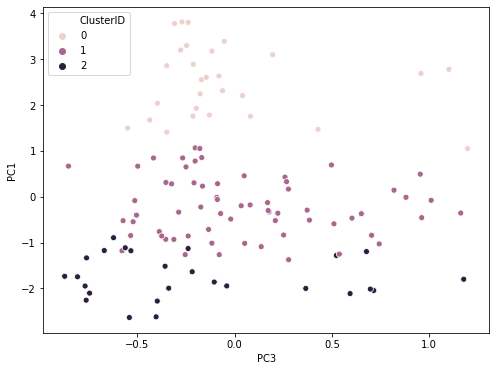

In [2889]:
#Visualising the clusters on the original principal components
#PC3 vs PC1
plt.figure(figsize = (8,6))
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=df5)
plt.show()

In [2890]:
#One thing we noticed is some even though some distinct clusters are being formed, some are not so good.
#Now creating the cluster means wrt to the various variables mentioned in the question and plot and see how they are related
df6=pd.merge(df,df5,on='country')
df7=df6[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
clu_chi = pd.DataFrame(df7.groupby(["ClusterID"]).child_mort.mean())
clu_exp = pd.DataFrame(df7.groupby(["ClusterID"]).exports.mean())
clu_imp = pd.DataFrame(df7.groupby(["ClusterID"]).imports.mean())
clu_hea = pd.DataFrame(df7.groupby(["ClusterID"]).health.mean())
clu_inc = pd.DataFrame(df7.groupby(["ClusterID"]).income.mean())
clu_inf = pd.DataFrame(df7.groupby(["ClusterID"]).inflation.mean())         
clu_lif = pd.DataFrame(df7.groupby(["ClusterID"]).life_expec.mean())
clu_tot = pd.DataFrame(df7.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = pd.DataFrame(df7.groupby(["ClusterID"]).gdpp.mean())

df_1 = pd.concat([pd.Series([0,1,2,3,4]),clu_chi,clu_exp,clu_imp,clu_hea,clu_inc,clu_inf,clu_lif,clu_tot,clu_gdpp], axis=1)
df_1.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_1

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,5.550000,14438.885714,13446.925000,3152.186429,37460.714286,2.682964,79.646429,1.790357,34146.428571
1,1,22.904615,2701.335208,2866.453555,376.694160,11539.076923,6.698938,72.716923,2.303385,5999.569231
2,2,65.623077,992.063608,967.160615,146.082446,4738.461538,9.811154,62.546154,4.363846,2299.346154
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


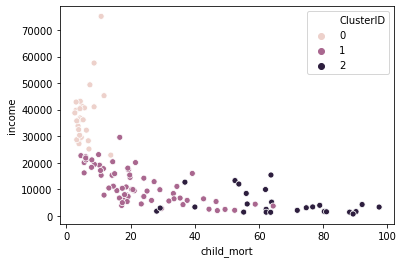

In [2891]:
#Visualising the child-mortality and income
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=df7)

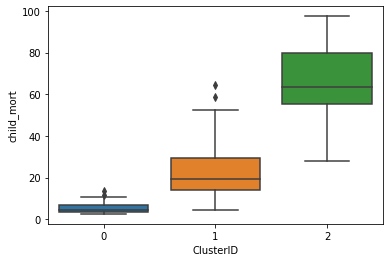

In [2892]:
sns.boxplot(x='ClusterID', y='child_mort', data=df7)
plt.show()

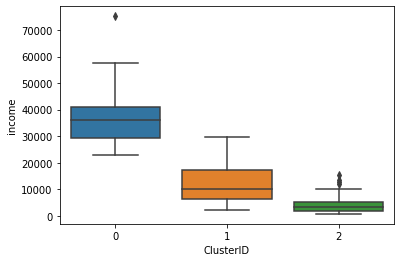

In [2893]:
sns.boxplot(x='ClusterID', y='income', data=df7)
plt.show()

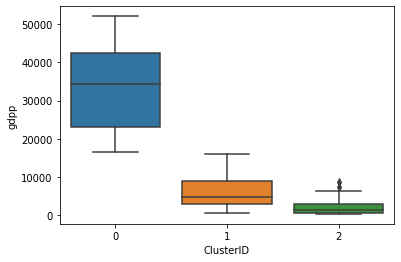

In [2894]:
sns.boxplot(x='ClusterID', y='gdpp', data=df7)
plt.show()

In [2895]:
#looking at those countries clusters formed.
df7[df7['ClusterID']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,2
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,2
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,2
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,2
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,2
38,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,2
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,2
42,Ghana,74.7,386.4500,601.290,68.3820,3060,16.60,62.2,4.27,1310,2
52,Iraq,36.9,1773.0000,1534.500,378.4500,12700,16.60,67.2,4.56,4500,2
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,2


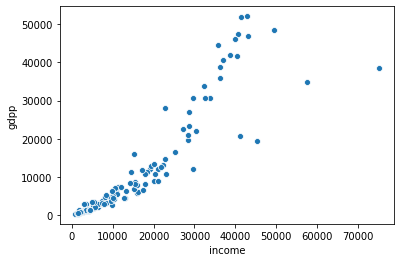

In [2896]:
#K-means has done a satisfactory job here. Let's take a different approach and make the clusters only on the basis of these
sns.scatterplot(x='income',y='gdpp',data=df7)
plt.show()

# Hierarchical clustering

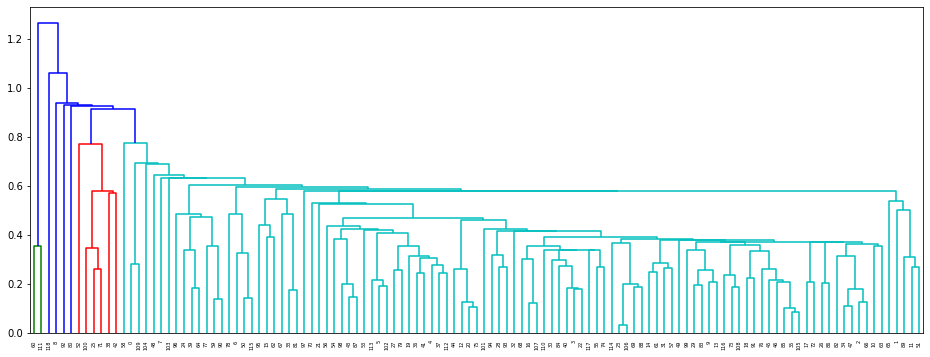

In [2897]:
#Hierarchical clustering.
#The single linkage procedure.
plt.figure(figsize = (16,6))
mergings = linkage(df3_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

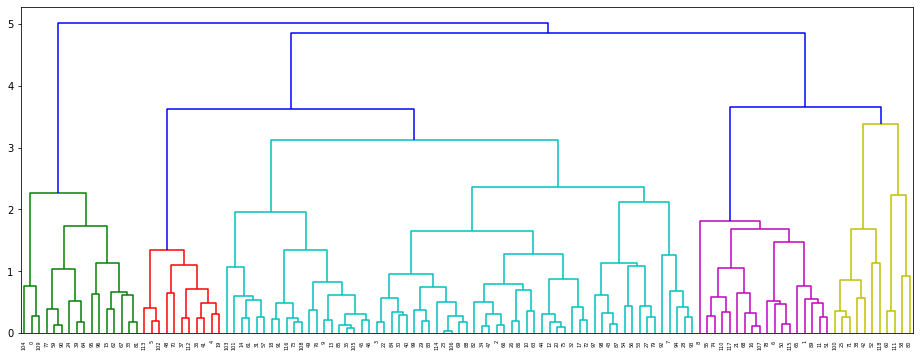

In [2898]:
#Complete linkage method
plt.figure(figsize = (16,6))
mergings = linkage(df3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [2899]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
df3_hc = pd.concat([df3, clusterCut], axis=1)
df3_hc.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
df3_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,2
4,Australia,3.180362,-0.250785,-0.116877,2


In [2900]:
df8=pd.merge(df,df3_hc,on='country')
df9=df8[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
df9.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,2
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,2
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,2


In [2901]:
df9['ClusterID'].value_counts()

2    74
1    29
0    16
Name: ClusterID, dtype: int64

In [2902]:
df9[df9['ClusterID']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,5551.00000,7185.800000,735.6600,19100,1.440,76.8,2.13,12200,2
3,Armenia,18.1,669.76000,1458.660000,141.6800,6700,7.770,73.3,1.69,3220,2
4,Australia,4.8,10276.20000,10847.100000,4530.8700,41400,1.160,82.0,1.93,51900,2
5,Austria,4.3,24059.70000,22418.200000,5159.0000,43200,0.873,80.5,1.44,46900,2
7,Bahamas,13.8,9800.00000,12236.000000,2209.2000,22900,-0.393,73.8,1.86,28000,2
9,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.140,70.4,2.33,758,2
10,Barbados,14.2,6320.00000,7792.000000,1275.2000,15300,0.321,76.7,1.78,16000,2
12,Belize,18.8,2525.88000,2495.500000,225.6800,7880,1.140,71.4,2.71,4340,2
13,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.990,72.1,2.38,2180,2
14,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.780,71.6,3.20,1980,2


In [2903]:
df9[df9['ClusterID']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Algeria,27.3,1712.6400,1400.440,185.982,12900,16.10,76.5,2.89,4460,1
6,Azerbaijan,39.2,3171.1200,1208.880,343.392,16000,13.80,69.1,1.92,5840,1
8,Bahrain,8.6,14386.5000,10536.300,1028.790,41100,7.44,76.0,2.16,20700,1
11,Belarus,5.5,3099.4200,3889.350,338.283,16200,15.10,70.4,1.49,6030,1
16,Brazil,19.8,1198.4000,1321.600,1009.120,14500,8.41,74.2,1.80,11200,1
21,Chile,8.7,4863.3000,4037.700,1026.840,19400,8.96,79.1,1.88,12900,1
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.404,5190,20.70,60.4,4.95,2740,1
38,Gabon,63.7,5048.7500,1653.750,306.250,15400,16.60,62.9,4.08,8750,1
42,Ghana,74.7,386.4500,601.290,68.382,3060,16.60,62.2,4.27,1310,1
50,Indonesia,33.3,755.7300,696.640,81.171,8430,15.30,69.9,2.48,3110,1


In [2904]:
df9[df9['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,0
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,0
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,0
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,0
62,Lao,78.9,403.5600,562.020,50.9580,3980,9.20,63.8,3.15,1140,0
64,Liberia,89.3,62.4570,302.802,38.5860,700,5.47,60.8,5.02,327,0
67,Madagascar,62.2,103.2500,177.590,15.5701,1390,8.79,60.8,4.60,413,0
77,Namibia,56.0,2480.8200,3150.330,351.8820,8460,3.56,58.6,3.60,5190,0


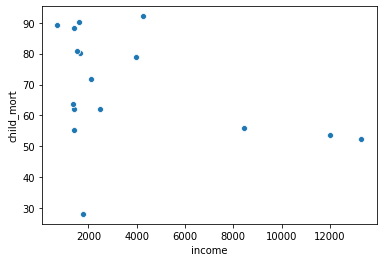

In [2905]:
#Let's visualise the clusters here. We don't see the countries properly clustered here. Hence we don't create cluster means
#as that would give a skewed result
df10=df9[df9['ClusterID']==0]
sns.scatterplot(x='income',y='child_mort',data=df10)
plt.show()

Final result : We use the clusters formed during K-means clustering to find the countries that we require since Hierarchical clustering is not showing proper clusters here. For K-means part, we got Cluster 2 is the ones which has a proper need of aid.

In [2906]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [2907]:
#Let's use the binning with gdpp first to see the list of countries which might be important.
#The upper limit that we got from the clustering process was 2299.
#let's filter the complete dataset with 2299 as the cut-off limit for gdpp.
df_2=df[df['gdpp']<=2299]
df_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553
12,Bangladesh,49.4,121.280,26.6816,165.244,2440,7.140,70.4,2.33,758
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758
18,Bhutan,42.7,926.500,113.3600,1541.260,6420,5.990,72.1,2.38,2180
19,Bolivia,46.6,815.760,95.8320,679.140,5410,8.780,71.6,3.20,1980


In [2908]:
print("Total Countires after binning : ",len(df_2))
df_2.describe()

Total Countires after binning :  51


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,82.196078,277.390932,55.648610,425.589061,2421.039216,8.701471,61.384314,4.456078,921.058824
std,38.227922,245.951433,36.811409,344.028228,1397.644203,5.720899,7.465906,1.399140,476.937330
min,17.200000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,1.270000,231.000000
25%,55.750000,102.497500,31.513200,185.067000,1400.000000,4.185000,57.400000,3.250000,557.500000
50%,80.300000,180.404000,45.744200,302.802000,1990.000000,7.640000,61.700000,4.750000,769.000000
75%,104.500000,414.393000,67.530500,497.965000,3300.000000,12.100000,66.550000,5.350000,1300.000000
max,208.000000,943.200000,190.710000,1541.260000,6420.000000,23.600000,73.100000,7.490000,2180.000000


In [2909]:
#From the clustering process we got child_mortality to be at least 65 for the most downtrodden cluster. 
#Let's see how many countries lie within that range
len(df_2[df_2['child_mort']>=65])

31

In [2910]:
#Ok so we got 31 countries now. We can stop here or take one more indicator and find the final list.
#Here we are taking income as the next one, where around 4738 was the income mean of the downtrodden cluster.
df_3=df_2[df_2['child_mort']>=65]
df_4=df_3[df_3['income']<4738]
len(df_4)

31

In [2911]:
#We've got 31 countries now, let's use the describe function to see how they're aligned again.
df_4.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,105.087097,211.263619,46.338029,327.191065,1896.548387,8.522097,57.761290,5.247742,766.354839
std,30.307224,167.187651,23.998061,221.377996,998.156161,5.972284,6.996984,0.977574,366.520718
min,66.800000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.150000,231.000000
25%,85.650000,101.515500,31.512200,181.706000,1200.000000,4.010000,55.900000,4.930000,473.500000
50%,97.400000,137.274000,40.634100,254.560000,1610.000000,6.810000,57.900000,5.270000,662.000000
75%,115.000000,291.190000,53.264750,400.286500,2520.000000,12.200000,62.000000,5.765000,1090.000000
max,208.000000,617.320000,129.870000,1181.700000,4280.000000,20.800000,68.200000,7.490000,1480.000000


In [2912]:
df_4.sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.18,58.7,4.87,488
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547


Final 10 Country List
>Burundi

>Liberia

>Congo, Dem. Rep.

>Niger

>Sierra Leone

>Mozambique

>Central African Republic

>Malawi

>Togo

>Guinea-Bissau

# END